# Project 1 Data Story and EAD

### Summary:

This is the continous work after the data set is cleansed, wranged and some fields were computed and added.  In the previous data cleasning and wranging notebook, I queried dataframe to get the records for the games occurred between righties and lefties.  From 2000 to 2019, there are total 10066 matches played between lefties and righties. The data has been written to the data file RL_h,csv.  Further, the RL_h data has been normalized to total 20132 rows and the data has been written to RL_v.csv.

The purpose is to answer the question: does ATP left hand player have advantage against ATP right hand player on serve?


In [819]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
import seaborn as sns
from os import listdir
import re
from scipy.stats import stats
from scipy import stats

In [820]:
# some functions may use later
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y 

In [821]:
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 

### Import data from data files created by Data Clean and wrange process

In [822]:
df = pd.read_csv('data/RL_v.csv')
df2 = pd.read_csv('data/RL_h.csv')
df_all = pd.read_csv('data/all_v_00_19.csv')

In [823]:
df_all.shape

(90602, 41)

In [824]:
df[(df.player_id==104745) & (df.year==2018)].head()

,Unnamed: 0,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,player_id,player_name,player_hand,...,sv2ndIn_pct,sv1stWon_pct,sv2ndWon_pct,GmsWon,GmsLoss,year,opponent_id,opponent_name,won_flag,player_age_bucket
9582,139,2018-580,Australian Open,Hard,G,20180115,101,104745,Rafael Nadal,L,...,0.27,0.56,0.18,18.0,3.0,2018,103607,Victor Estrella,1,30-34
9588,203,2018-580,Australian Open,Hard,G,20180115,201,104745,Rafael Nadal,L,...,0.27,0.59,0.16,18.0,13.0,2018,104919,Leonardo Mayer,1,30-34
9591,235,2018-580,Australian Open,Hard,G,20180115,301,104745,Rafael Nadal,L,...,0.35,0.43,0.24,18.0,5.0,2018,106000,Damir Dzumhur,1,30-34
9595,251,2018-580,Australian Open,Hard,G,20180115,401,104745,Rafael Nadal,L,...,0.32,0.43,0.19,24.0,15.0,2018,106043,Diego Sebastian Schwartzman,1,30-34
9671,1081,2018-0410,Monte Carlo Masters,Clay,M,20180416,285,104745,Rafael Nadal,L,...,0.33,0.50,0.23,12.0,4.0,2018,105379,Aljaz Bedene,1,30-34


In [825]:
df['bpLoss']=df.bpFaced - df.bpSaved

In [826]:
df['bpLoss'].head()

0    1.0
1    1.0
2    3.0
3    3.0
4    3.0
Name: bpLoss, dtype: float64

### From 2000 to 2019, there are total 10066 matches played between lefities and righties.  The below chart shows how it breaks down by the different levels.

Total matches between righties and lefties by tourney level


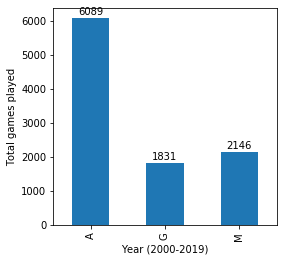

In [827]:
print('Total matches between righties and lefties by tourney level')

plt.figure(figsize=(4,4))
tourney_plot=df2.groupby('tourney_level').tourney_id.count().plot(kind='bar')
plt.xlabel('Year (2000-2019)')
plt.ylabel('Total games played')
add_value_labels(tourney_plot, 1)
plt.show()

In [828]:
Total_players = len(df['player_id'].drop_duplicates())
Total_players_R = len(df[df.player_hand=='R'].player_id.drop_duplicates())
Total_players_L = len(df[df.player_hand=='L'].player_id.drop_duplicates())
ratio_of_L = np.around(Total_players_L / Total_players, 2)
print('Total '+str(Total_players) +' players played games between righties and lefties')
print(str(Total_players_R) +' are righties and '+ str(Total_players_L) + ' are lefties')
print('The ratio of lefties of players of this data set is ' + str(ratio_of_L))

Total 625 players played games between righties and lefties
519 are righties and 106 are lefties
The ratio of lefties of players of this data set is 0.17


Total matches played yearly for sampled data for righties and lefties analysis


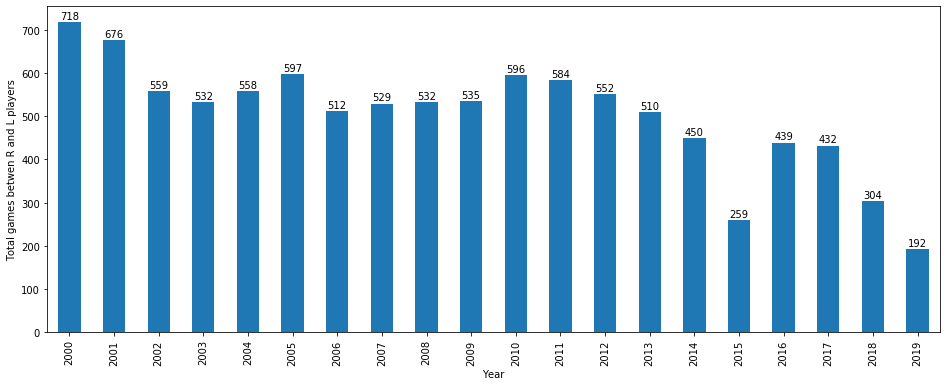

In [829]:
print('Total matches played yearly for sampled data for righties and lefties analysis')

plt.figure(figsize=(16,6))
game_plot=df2.groupby('year').tourney_id.count().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total games betwen R and L players')
add_value_labels(game_plot, 1)
plt.show()

## Exam players data

Righties and lefties played in each year


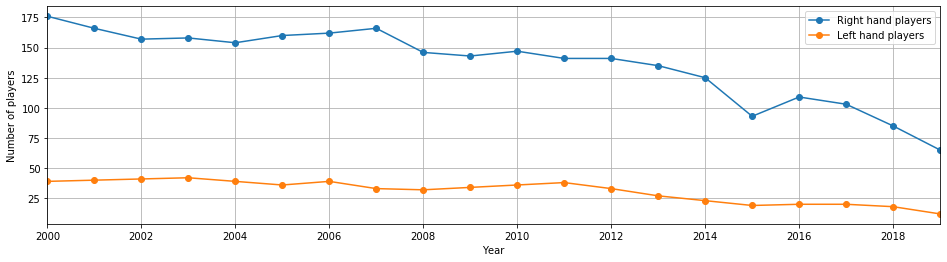

In [830]:
# get player count for eacha year
righties_n_lefties_by_year = df[['year', 'player_id', 'player_hand']].drop_duplicates()

print('Righties and lefties played in each year')
plt.figure(figsize=(16,4))

player_plot1=righties_n_lefties_by_year[righties_n_lefties_by_year.player_hand=='R'].groupby('year').player_id.count().plot(kind='line', 
                                                                    grid=True, label='Right hand players',marker='o')
player_plot1=righties_n_lefties_by_year[righties_n_lefties_by_year.player_hand=='L'].groupby('year').player_id.count().plot(kind='line', 
                                                                    grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Number of players')
h1, l1 = player_plot1.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Player height observation: average height of lefties are taller than the righties played in the same year except year 2003, 2008 and 2009.   

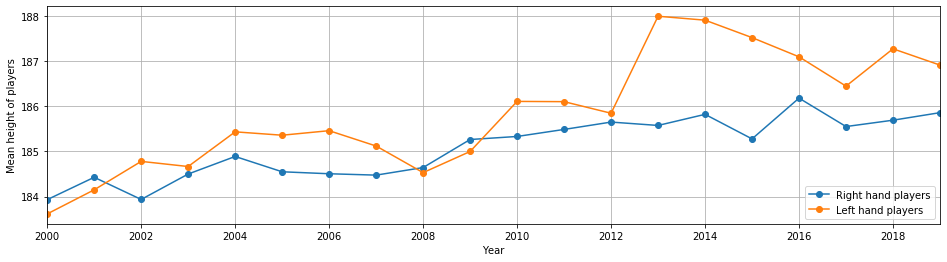

In [831]:
# get player height for eacha year
height_by_year = df[['year', 'player_id', 'player_ht', 'player_hand']].drop_duplicates()

plt.figure(figsize=(16,4))

height_plot1=height_by_year[height_by_year.player_hand=='R'].groupby('year').player_ht.mean().plot(kind='line', 
                                                                      grid=True, label='Right hand players',marker='o')
height_plot2=height_by_year[height_by_year.player_hand=='L'].groupby('year').player_ht.mean().plot(kind='line', 
                                                                      grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Mean height of players')
h1, l1 = height_plot1.get_legend_handles_labels()
plt.legend(h1, l1, loc=4)
plt.show()

### Compared mean of rank of each year, the average of rank of righties is higher than lefties.  

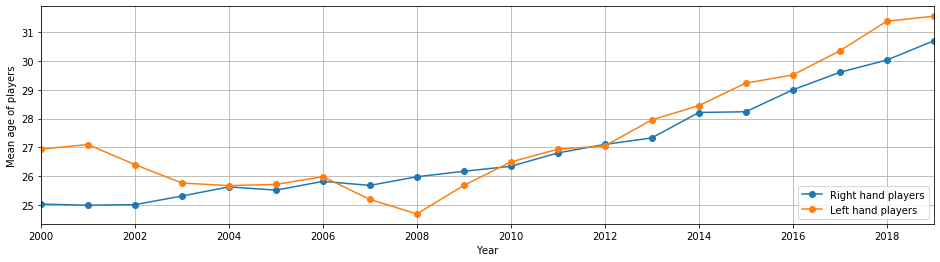

In [832]:
# get player age for eacha year
age_by_year = df[['year', 'player_id', 'player_age', 'player_hand']].drop_duplicates()

plt.figure(figsize=(16,4))

age_plot1=age_by_year[age_by_year.player_hand=='R'].groupby('year').player_age.mean().plot(kind='line', 
                                                            grid=True, label='Right hand players',marker='o')
age_plot2=age_by_year[age_by_year.player_hand=='L'].groupby('year').player_age.mean().plot(kind='line', 
                                                            grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Mean age of players')
h1, l1 = age_plot1.get_legend_handles_labels()
plt.legend(h1, l1, loc=4)
plt.show()

### Before 2004 and after 2012, the average age of lefties is older than righties.

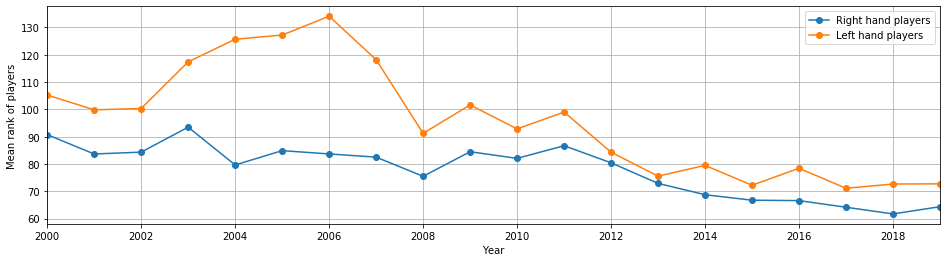

In [833]:
# get player rank for eacha year
rank_by_year = df[['year', 'player_id', 'player_rank', 'player_hand']].drop_duplicates()

plt.figure(figsize=(16,4))

rank_plot1=rank_by_year[rank_by_year.player_hand=='R'].groupby('year').player_rank.mean().plot(kind='line', 
                                                                    grid=True, label='Right hand players',marker='o')
rank_plot2=rank_by_year[rank_by_year.player_hand=='L'].groupby('year').player_rank.mean().plot(kind='line', 
                                                                    grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Mean rank of players')
h1, l1 = rank_plot1.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Plot player rank in bar chart, the mean rank of righties is higher than lefties.

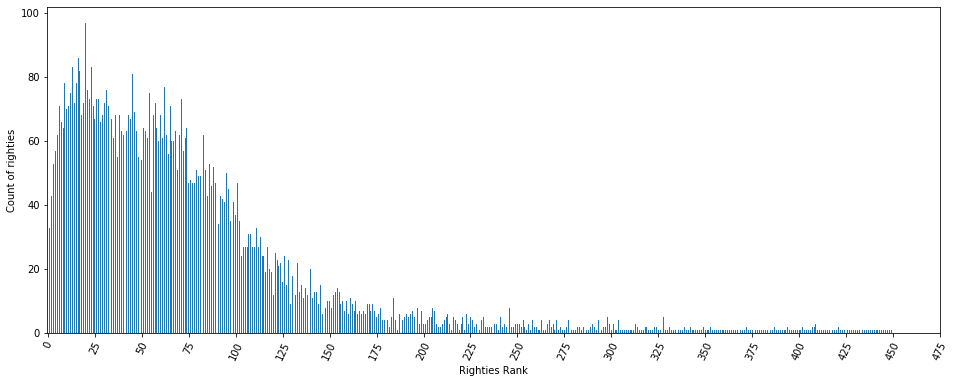

In [834]:
plt.figure(figsize=(16,6))

rank_label = np.arange(0, 500, 25)

rank_plot=rank_by_year[rank_by_year.player_hand=='R'].groupby('player_rank').player_id.count().plot(kind='bar')
plt.xlabel('Righties Rank')
plt.ylabel('Count of righties')
plt.xticks(range(0, 500, 25))
rank_plot.set_xticklabels(rank_label, rotation=65)
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
#add_value_labels(rank_plot, 50)
plt.show()

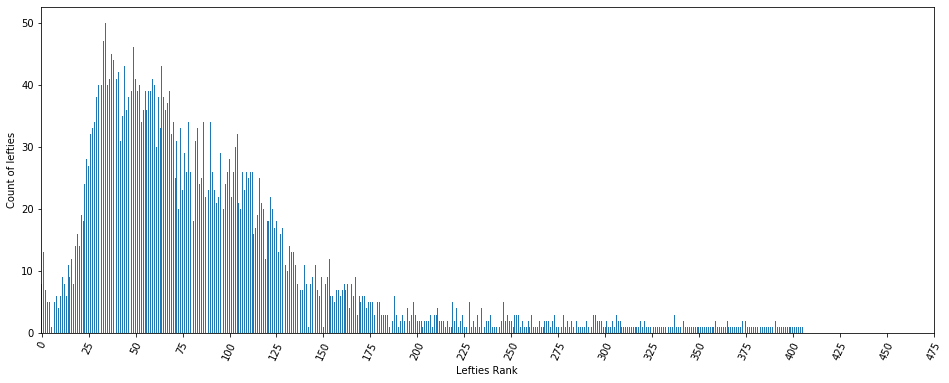

In [835]:
plt.figure(figsize=(16,6))

rank_plot=rank_by_year[rank_by_year.player_hand=='L'].groupby('player_rank').player_id.count().plot(kind='bar')
plt.xlabel('Lefties Rank')
plt.ylabel('Count of lefties')
plt.xticks(range(0, 500, 25))
rank_plot.set_xticklabels(rank_label, rotation=65)
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
#add_value_labels(rank_plot, 50)
plt.show()

### Plot palyer rank in boxplot also shows that the righties have higher ranking than lefties at 25%, 50%, 75% quantile

[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

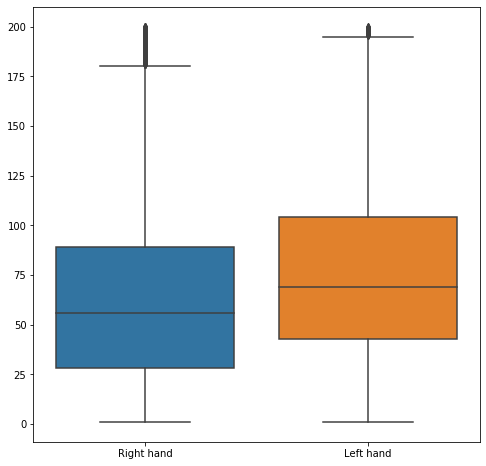

In [836]:
## combine these different collections into a list  
data1 = rank_by_year[(rank_by_year.player_rank<=200) & (rank_by_year.player_hand=='R')].player_rank
data2 = rank_by_year[(rank_by_year.player_rank<=200) & (rank_by_year.player_hand=='L')].player_rank
data_to_plot = [data1, data2]

xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

### Compared 20 year mean ace percentage for righteis and lefties, the righties had higher ace percentag than lefties

The mean ace% of righties is 0.07824557917742471
The mean ace% of lefties is 0.07222928670772485


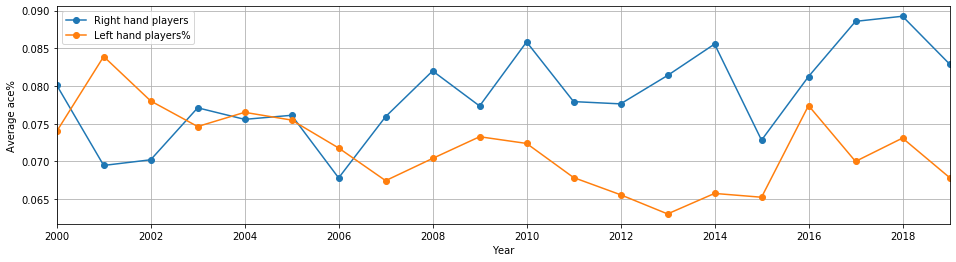

In [837]:
mean_df_r = df[df.player_hand=='R'].ace_pct.mean()
mean_df_l = df[df.player_hand=='L'].ace_pct.mean()

print('The mean ace% of righties is ' + str(mean_df_r))
print('The mean ace% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,4))

#ace_plot=df.groupby('year').ace_pct.mean().plot(kind='line', grid=True, label='All players')
ace_plot=df[df.player_hand=='R'].groupby('year').ace_pct.mean().plot(kind='line', grid=True, label='Right hand players',marker='o')
ace_plot=df[df.player_hand=='L'].groupby('year').ace_pct.mean().plot(kind='line', grid=True, label='Left hand players%',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average ace%')
h1, l1 = ace_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

### Lefties has a little higher double fault percentage than righties

The mean double fault% of righties is 0.03750546393800847
The mean double fault% of lefties is 0.03961951122590822


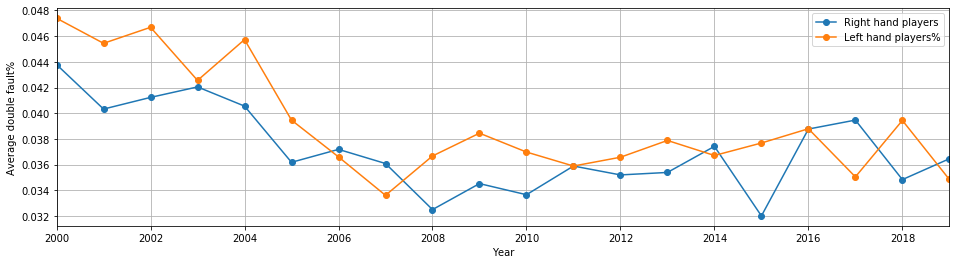

In [838]:
mean_df_r = df[df.player_hand=='R'].df_pct.mean()
mean_df_l = df[df.player_hand=='L'].df_pct.mean()

print('The mean double fault% of righties is ' + str(mean_df_r))
print('The mean double fault% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,4))

#ace_plot=df.groupby('year').ace_pct.mean().plot(kind='line', grid=True, label='All players')
df_plot=df[df.player_hand=='R'].groupby('year').df_pct.mean().plot(kind='line', grid=True, label='Right hand players',marker='o')
df_plot=df[df.player_hand=='L'].groupby('year').df_pct.mean().plot(kind='line', grid=True, label='Left hand players%',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average double fault%')
h1, l1 = df_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Compared 20 year matches, lefties do have higher first in server percentage.

The mean serve 1st In% of righties is 0.6056288495926871
The mean serve 1st In% of lefties is 0.616906417643557


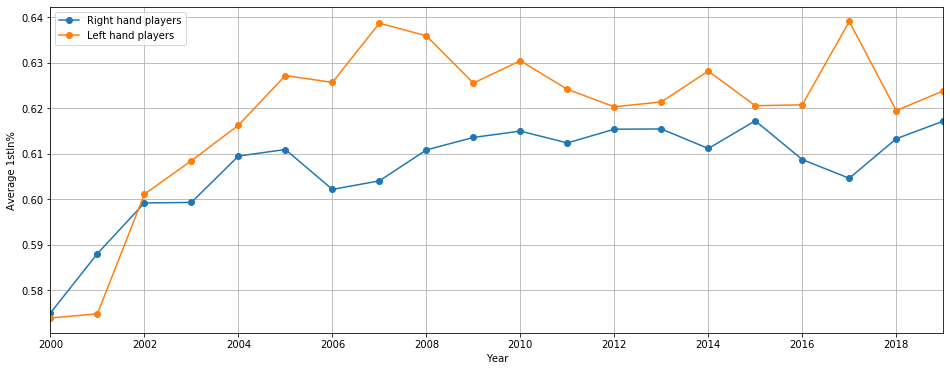

In [839]:
mean_df_r = df[df.player_hand=='R'].sv1stIn_pct.mean()
mean_df_l = df[df.player_hand=='L'].sv1stIn_pct.mean()

print('The mean serve 1st In% of righties is ' + str(mean_df_r))
print('The mean serve 1st In% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

#v1stIn_plot=df.groupby('year').sv1stIn_pct.mean().plot(kind='line', grid=True, label='All players')
v1stIn_plot=df[df.player_hand=='R'].groupby('year').sv1stIn_pct.mean().plot(kind='line', 
                                                    grid=True, label='Right hand players',marker='o')
v1stIn_plot=df[df.player_hand=='L'].groupby('year').sv1stIn_pct.mean().plot(kind='line', 
                                                    grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average 1stIn%')
h1, l1 = v1stIn_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

### The first serve won percentage seems no significant difference between rightie and lefties 

The mean serve 1st Won% of righties is 0.4362437909795337
The mean serve 1st Won% of lefties is 0.4361464335386423


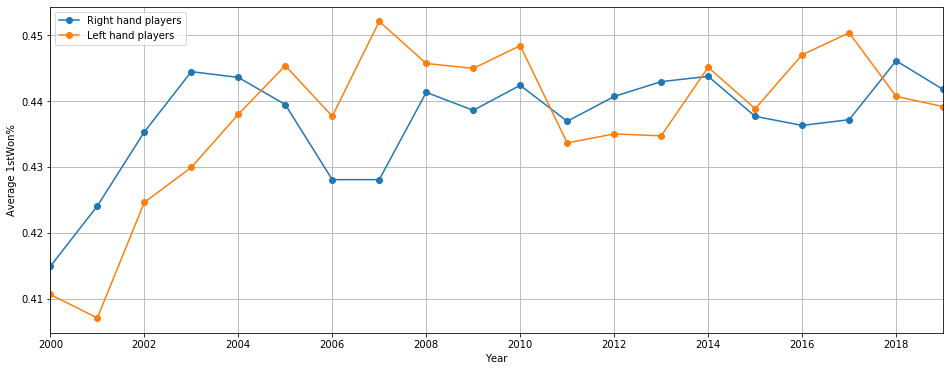

In [840]:
mean_df_r = df[df.player_hand=='R'].sv1stWon_pct.mean()
mean_df_l = df[df.player_hand=='L'].sv1stWon_pct.mean()

print('The mean serve 1st Won% of righties is ' + str(mean_df_r))
print('The mean serve 1st Won% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

#sv1stWon_plot=df.groupby('year').sv1stWon_pct.mean().plot(kind='line', grid=True, label='players 1sfIn%')
sv1stWon_plot=df[df.player_hand=='R'].groupby('year').sv1stWon_pct.mean().plot(kind='line', 
                                                        grid=True, label='Right hand players',marker='o')
sv1stWon_plot=df[df.player_hand=='L'].groupby('year').sv1stWon_pct.mean().plot(kind='line', 
                                                        grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average 1stWon%')
h1, l1 = sv1stWon_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

### Righties also have higher second serve in percentage than lefities

The mean serve 2nd In% of righties is 0.3943592290880176
The mean serve 2nd In% of lefties is 0.383077687264055


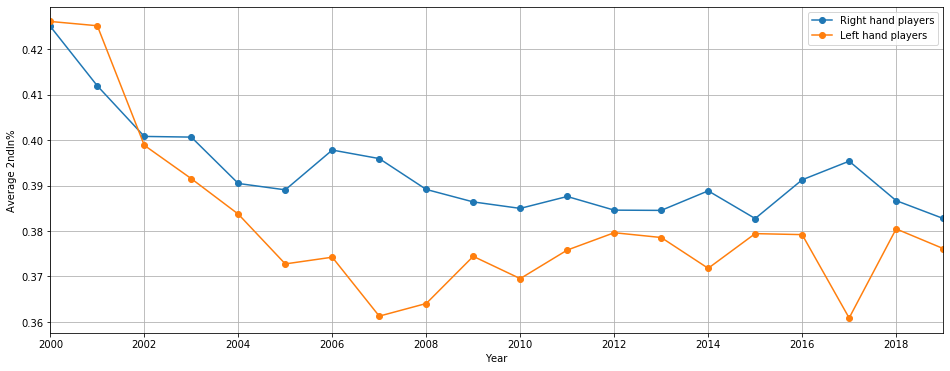

In [841]:
mean_df_r = df[df.player_hand=='R'].sv2ndIn_pct.mean()
mean_df_l = df[df.player_hand=='L'].sv2ndIn_pct.mean()

print('The mean serve 2nd In% of righties is ' + str(mean_df_r))
print('The mean serve 2nd In% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

#sv2ndIn_plot=df.groupby('year').sv2ndIn_pct.mean().plot(kind='line', grid=True, label='All players')
sv2ndIn_plot=df[df.player_hand=='R'].groupby('year').sv2ndIn_pct.mean().plot(kind='line', 
                                                    grid=True, label='Right hand players',marker='o')
sv2ndIn_plot=df[df.player_hand=='L'].groupby('year').sv2ndIn_pct.mean().plot(kind='line', 
                                                    grid=True, label='Left hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average 2ndIn%')
h1, l1 = sv2ndIn_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Also the average second serve won percentage of righties through years are higher than lefties 

The mean serve 2nd Won% of righties is 0.20377011722632207
The mean serve 2nd Won% of lefties is 0.19503973773099076


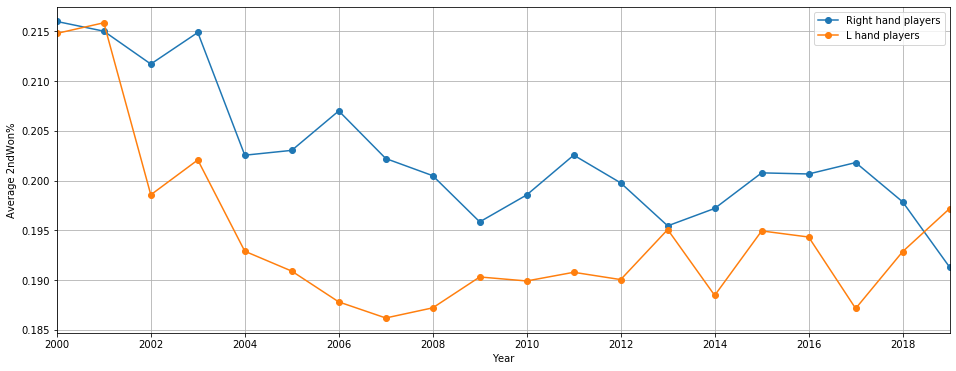

In [842]:
mean_df_r = df[df.player_hand=='R'].sv2ndWon_pct.mean()
mean_df_l = df[df.player_hand=='L'].sv2ndWon_pct.mean()

print('The mean serve 2nd Won% of righties is ' + str(mean_df_r))
print('The mean serve 2nd Won% of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

#sv2ndWon_plot=df.groupby('year').sv2ndWon_pct.mean().plot(kind='line', grid=True, label='All players')
sv2ndWon_plot=df[df.player_hand=='R'].groupby('year').sv2ndWon_pct.mean().plot(kind='line', 
                                                grid=True, label='Right hand players',marker='o')
sv2ndWon_plot=df[df.player_hand=='L'].groupby('year').sv2ndWon_pct.mean().plot(kind='line', 
                                                grid=True, label='L hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average 2ndWon%')
h1, l1 = sv2ndWon_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### The average break points lefties faced are higher than righties.  

The mean break points loss of righties is 2.5979535068547586
The mean break points loss of lefties is 2.722531293463143


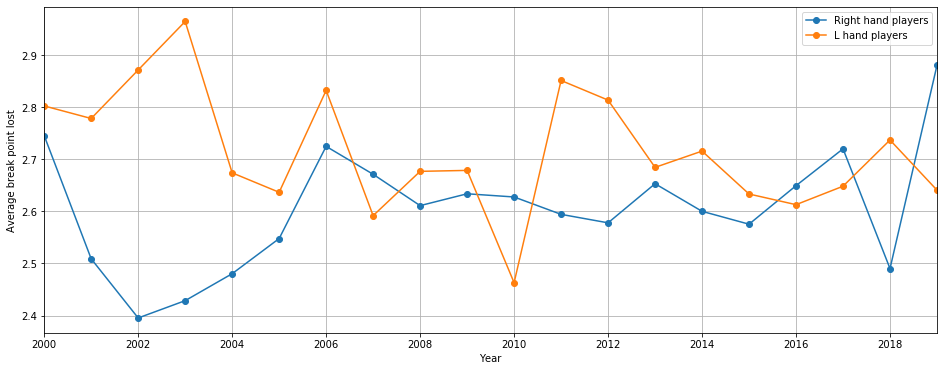

In [843]:
mean_df_r = df[df.player_hand=='R'].bpLoss.mean()
mean_df_l = df[df.player_hand=='L'].bpLoss.mean()

print('The mean break points loss of righties is ' + str(mean_df_r))
print('The mean break points loss of lefties is ' + str(mean_df_l))

plt.figure(figsize=(16,6))

sv2ndWon_plot=df[df.player_hand=='R'].groupby('year').bpLoss.mean().plot(kind='line', 
                                                grid=True, label='Right hand players',marker='o')
sv2ndWon_plot=df[df.player_hand=='L'].groupby('year').bpLoss.mean().plot(kind='line', 
                                                grid=True, label='L hand players',marker='o')
plt.xticks(range(2000, 2020,2))
plt.xlabel('Year')
plt.ylabel('Average break point lost')
h1, l1 = sv2ndWon_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)
plt.show()

### Righties won more matches than lefities 

In [844]:
sum_won_r = df[df.player_hand=='R'].won_flag.sum()
sum_won_l = df[df.player_hand=='L'].won_flag.sum()

print('Total matches won by righties = ' + str(sum_won_r))
print('Total matches won by lefties = ' + str(sum_won_l))

Total matches won by righties = 5261
Total matches won by lefties = 4805


## Is there significant statistical difference between righties and lefties on serve?

In [845]:
def bootstrap_replicate_1d (data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps (data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d (data, func)
    return bs_replicates

In [846]:
def draw_bs_reps_stddiff (data1, data2, size=1):
    
    bs_rep_diff = np.empty(size)
    
    for i in range(size):
        
        bs_replicates_1 = np.random.choice(data1, size=len(data1))
        bs_replicates_2 = np.random.choice(data2, size=len(data2))
        
        bs_rep_diff [i] = np.std(bs_replicates_1,ddof=1) - np.std(bs_replicates_2, ddof=1)
        
    return bs_rep_diff

In [847]:
N_rep = 10000
# 95%interval.  Because compare difference so two-sided
intv = [2.5, 97.5]

### Statistical significant difference test for ace% between righties and lefties:

Null Hypothesis: ace% of righties and lefties are the same 

Alternative Hypothesis: ace% of lefties are higher than righties

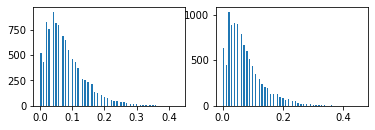

In [848]:
nr = df[df.player_hand=='R'].ace_pct
nl = df[df.player_hand=='L'].ace_pct

plt.subplot(2,2,1)
_=plt.hist(nr, bins=100)
plt.subplot(2,2,2)
_=plt.hist(nl, bins=100)
plt.show()

In [849]:
lefties = df[df.player_hand=='L'].ace_pct
righties = df[df.player_hand=='R'].ace_pct
s, p = stats.ttest_ind(lefties, righties, equal_var = False)
print('T test statistic = ' + str(s))
print('T test p-value = ' + str(p))

T test statistic = -7.153740610822604
T test p-value = 8.734314994379075e-13


#### T-test shows statistical significant difference of ace% between righties and lefties.  Reject null hypothesis

### Bootstrap test:

Calculate the mean over 10000 replicates for lefities and rities. Calculate the 95% confidence interval for the mean of righties and lefties. Plot the boxplot to show the difference of two mean sample distributions.  

In [850]:
bs_rep_r = draw_bs_reps(righties, np.mean, N_rep)
bs_rep_l = draw_bs_reps(lefties, np.mean, N_rep)
r_int_low, r_int_high = np.percentile(bs_rep_r, [2.5, 97.5])
l_int_low, l_int_high = np.percentile(bs_rep_l, [2.5, 97.5])


print('righties mean ='+str(bs_rep_r.mean()), 'lefties mean = '+ str(bs_rep_l.mean()))
print('righties 95% confidence interval: '+ '[' + str(r_int_low) + ',' + str(r_int_high)+']')
print('lefties 95% confidence interval: '+ '[' + str(l_int_low) + ',' + str(l_int_high)+']')

righties mean =0.07824907728988675 lefties mean = 0.0722484260878204
righties 95% confidence interval: [0.07707922710113253,0.07942683290284128]
lefties 95% confidence interval: [0.0710917693224717,0.0734442678323068]


[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

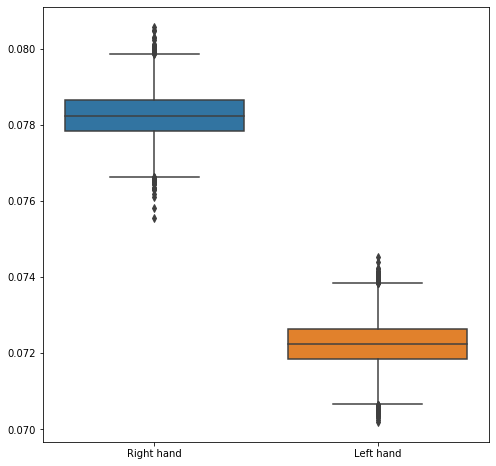

In [851]:
data_to_plot = [bs_rep_r, bs_rep_l]
xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

#### Conclusion: Statisitcally, lefties don't have advantage to serve ace better than righties

### Statistical significant difference test for 1st serve In% between righties and lefties:

Null Hypothesis: 1stIn% of righties and lefties are the same.

Alternative Hypothesis: 1stIn% of lefties are higher than righties


First, plot histogram.  They are normal distribution.

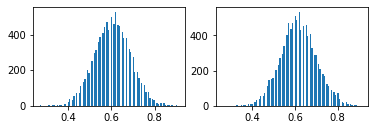

In [852]:
nr = df[df.player_hand=='R'].sv1stIn_pct
nl = df[df.player_hand=='L'].sv1stIn_pct

plt.subplot(2,2,1)
_=plt.hist(nr, bins=100)
plt.subplot(2,2,2)
_=plt.hist(nl, bins=100)
plt.show()

In [853]:
lefties = df[df.player_hand=='L'].sv1stIn_pct
righties = df[df.player_hand=='R'].sv1stIn_pct
s, p = stats.ttest_ind(lefties, righties, equal_var = False)
print('T test statistic = ' + str(s))
print('T test p-value = ' + str(p))

T test statistic = 9.614444488897238
T test p-value = 7.7413832626586535e-22


#### T test shows statistical significant difference of 1st serve in% between righties and lefties. Reject null hypothesis

##### Bootstrap test:
Calculate the mean over 10000 replicates for lefities and rities. Calculate the 95% confidence interval for the mean of righties and lefties. Plot the boxplot to show the difference of two mean sample distributions.

In [854]:
bs_rep_r = draw_bs_reps(righties, np.mean, N_rep)
bs_rep_l = draw_bs_reps(lefties, np.mean, N_rep)
r_int_low, r_int_high = np.percentile(bs_rep_r, [2.5, 97.5])
l_int_low, l_int_high = np.percentile(bs_rep_l, [2.5, 97.5])


print('righties mean ='+str(bs_rep_r.mean()), 'lefties mean = '+ str(bs_rep_l.mean()))
print('righties 95% confidence interval: '+ '[' + str(r_int_low) + ',' + str(r_int_high)+']')
print('lefties 95% confidence interval: '+ '[' + str(l_int_low) + ',' + str(l_int_high)+']')

righties mean =0.6056245334790383 lefties mean = 0.6168951434532088
righties 95% confidence interval: [0.6039786658056825,0.6072670623882376]
lefties 95% confidence interval: [0.6152185078482019,0.6185367077289887]


[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

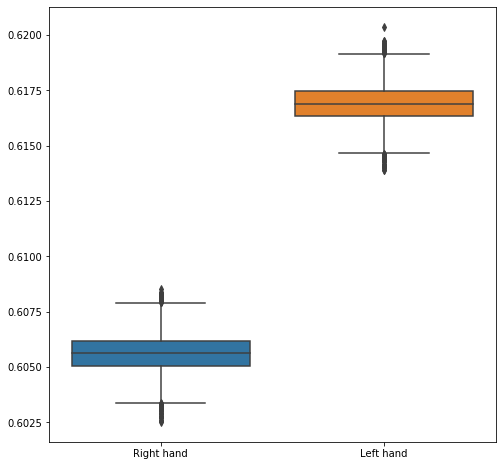

In [855]:
data_to_plot = [bs_rep_r, bs_rep_l]
xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

#### Conclusion: Statisitcally, lefties first serve in percentage is higher than righties

### Statistical significant difference test for 1st serve won% between righties and lefties:

#### T-test:

Null Hypothesis: 1stWon% of righties and lefties are the same

Alternative Hypothesis: 1stWon% of lefties are higher than righties

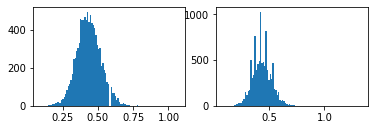

In [856]:
nr = df[df.player_hand=='R'].sv1stWon_pct
nl = df[df.player_hand=='L'].sv1stWon_pct

plt.subplot(2,2,1)
_=plt.hist(nr, bins=100)
plt.subplot(2,2,2)
_=plt.hist(nl, bins=100)
plt.show()

In [857]:
lefties = df[df.player_hand=='L'].sv1stWon_pct
righties = df[df.player_hand=='R'].sv1stWon_pct
s, p = stats.ttest_ind(lefties, righties, equal_var = False)
print('T test statistic = ' + str(s))
print('T test p-value = ' + str(p))

T test statistic = -0.08066787392771876
T test p-value = 0.935706888439618


#### T test shows no significant difference between righties and lefties on sv1stWon_pct.  Accept Null Hypothesis

In [858]:
bs_rep_r = draw_bs_reps(righties, np.mean, N_rep)
bs_rep_l = draw_bs_reps(lefties, np.mean, N_rep)
r_int_low, r_int_high = np.percentile(bs_rep_r, [2.5, 97.5])
l_int_low, l_int_high = np.percentile(bs_rep_l, [2.5, 97.5])


print('righties mean ='+str(bs_rep_r.mean()), 'lefties mean = '+ str(bs_rep_l.mean()))
print('righties 95% confidence interval: '+ '[' + str(r_int_low) + ',' + str(r_int_high)+']')
print('lefties 95% confidence interval: '+ '[' + str(l_int_low) + ',' + str(l_int_high)+']')

righties mean =0.43624882733955894 lefties mean = 0.43615825799721836
righties 95% confidence interval: [0.4345718259487383,0.4379227349493344]
lefties 95% confidence interval: [0.43450124180409294,0.4378134561891516]


[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

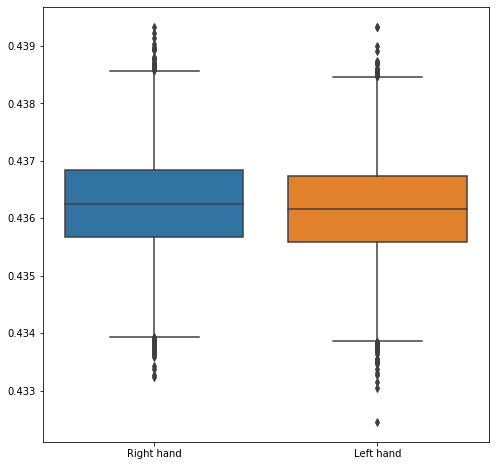

In [859]:
data_to_plot = [bs_rep_r, bs_rep_l]
xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

### Statistical significant difference test for 2nd serve In% between righties and lefties:

Null Hypothesis: 2ndIn% of righties and lefties are the same
    
Alternative Hypothesis: 2ndIn% of lefties are higher than righties

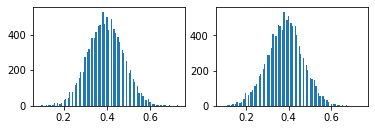

In [860]:
nr = df[df.player_hand=='R'].sv2ndIn_pct
nl = df[df.player_hand=='L'].sv2ndIn_pct

plt.subplot(2,2,1)
_=plt.hist(nr, bins=100)
plt.subplot(2,2,2)
_=plt.hist(nl, bins=100)
plt.show()

In [861]:
lefties = df[df.player_hand=='L'].sv2ndIn_pct
righties = df[df.player_hand=='R'].sv2ndIn_pct
s, p = stats.ttest_ind(lefties, righties, equal_var = False)
print('T test statistic = ' + str(s))
print('T test p-value = ' + str(p))

T test statistic = -9.618548671846435
T test p-value = 7.440045021257428e-22


#### T test shows statistical significant difference of 2nd serve in% between righties and lefties. Reject null hypothesis

In [862]:
bs_rep_r = draw_bs_reps(righties, np.mean, N_rep)
bs_rep_l = draw_bs_reps(lefties, np.mean, N_rep)
r_int_low, r_int_high = np.percentile(bs_rep_r, [2.5, 97.5])
l_int_low, l_int_high = np.percentile(bs_rep_l, [2.5, 97.5])


print('righties mean ='+str(bs_rep_r.mean()), 'lefties mean = '+ str(bs_rep_l.mean()))
print('righties 95% confidence interval: '+ '[' + str(r_int_low) + ',' + str(r_int_high)+']')
print('lefties 95% confidence interval: '+ '[' + str(l_int_low) + ',' + str(l_int_high)+']')

righties mean =0.3943507966421617 lefties mean = 0.38307988764156564
righties 95% confidence interval: [0.3927687264057222,0.39598152195509634]
lefties 95% confidence interval: [0.3814593433339956,0.38470795251341144]


[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

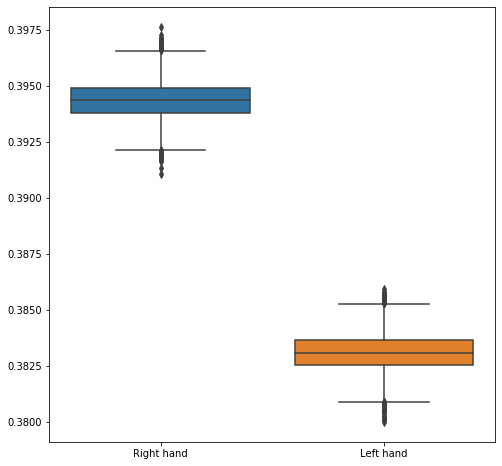

In [863]:
data_to_plot = [bs_rep_r, bs_rep_l]
xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

#### Conclusion: Statisitcally, righties have better 2nd serve In % than lefties 

### Statistical significant difference test for 2nd serve won% between righties and lefties:

Null Hypothesis: 2ndWon% of righties and lefties are the same

Alternative Hypothesis: 2ndWon% of lefties are higher than righties

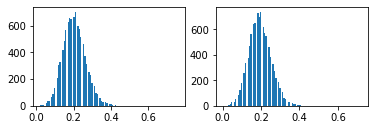

In [864]:
nr = df[df.player_hand=='R'].sv2ndWon_pct
nl = df[df.player_hand=='L'].sv2ndWon_pct

plt.subplot(2,2,1)
_=plt.hist(nr, bins=100)
plt.subplot(2,2,2)
_=plt.hist(nl, bins=100)
plt.show()

In [865]:
lefties = df[df.player_hand=='L'].sv2ndWon_pct
righties = df[df.player_hand=='R'].sv2ndWon_pct
s, p = stats.ttest_ind(lefties, righties, equal_var = False)
print('T test statistic = ' + str(s))
print('T test p-value = ' + str(p))

T test statistic = -10.23061923720015
T test p-value = 1.6603904037653647e-24


#### T test shows that statistical significant difference of 2nd serve won% between righties and lefties.  Reject Null Hypothesis

In [866]:
bs_rep_r = draw_bs_reps(righties, np.mean, N_rep)
bs_rep_l = draw_bs_reps(lefties, np.mean, N_rep)
r_int_low, r_int_high = np.percentile(bs_rep_r, [2.5, 97.5])
l_int_low, l_int_high = np.percentile(bs_rep_l, [2.5, 97.5])


print('righties mean ='+str(bs_rep_r.mean()), 'lefties mean = '+ str(bs_rep_l.mean()))
print('righties 95% confidence interval: '+ '[' + str(r_int_low) + ',' + str(r_int_high)+']')
print('lefties 95% confidence interval: '+ '[' + str(l_int_low) + ',' + str(l_int_high)+']')

righties mean =0.2037730176832903 lefties mean = 0.1950498660838466
righties 95% confidence interval: [0.20259579276773299,0.20495929366183194]
lefties 95% confidence interval: [0.19388133320087425,0.19621599940393403]


[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

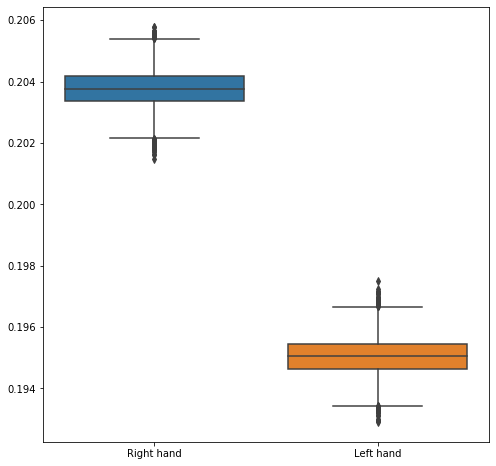

In [867]:
data_to_plot = [bs_rep_r, bs_rep_l]
xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

#### Conclusion: Statisitcally, , righties have better 2nd serve Won % than lefties  

### Statistical significant difference test for break point faced between righties and lefties:

Null Hypothesis: bpFaced of righties and lefties are the same

Alternative Hypothesis: bpFaced of lefties are lower than righties

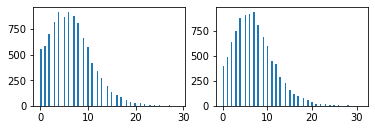

In [868]:
nr = df[df.player_hand=='R'].bpFaced
nl = df[df.player_hand=='L'].bpFaced

plt.subplot(2,2,1)
_=plt.hist(nr, bins=100)
plt.subplot(2,2,2)
_=plt.hist(nl, bins=100)
plt.show()

In [869]:
lefties = df[df.player_hand=='L'].bpFaced
righties = df[df.player_hand=='R'].bpFaced
s, p = stats.ttest_ind(lefties, righties, equal_var = False)
print('T test statistic = ' + str(s))
print('T test p-value = ' + str(p))

T test statistic = 7.326820695264647
T test p-value = 2.445761838339517e-13


#### T test shows statistical significant difference of break point faced between righties and lefties. Reject Null Hypothesis

In [870]:
bs_rep_r = draw_bs_reps(righties, np.mean, N_rep)
bs_rep_l = draw_bs_reps(lefties, np.mean, N_rep)
r_int_low, r_int_high = np.percentile(bs_rep_r, [2.5, 97.5])
l_int_low, l_int_high = np.percentile(bs_rep_l, [2.5, 97.5])


print('righties mean ='+str(bs_rep_r.mean()), 'lefties mean = '+ str(bs_rep_l.mean()))
print('righties 95% confidence interval: '+ '[' + str(r_int_low) + ',' + str(r_int_high)+']')
print('lefties 95% confidence interval: '+ '[' + str(l_int_low) + ',' + str(l_int_high)+']')

righties mean =6.597638187959467 lefties mean = 7.056593890323862
righties 95% confidence interval: [6.510724220147029,6.683988178025035]
lefties 95% confidence interval: [6.970693423405524,7.147032088217762]


[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

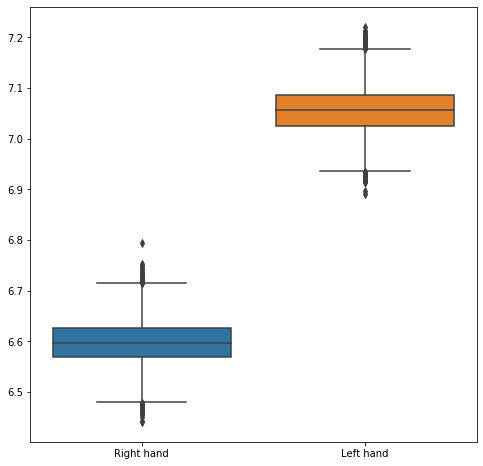

In [871]:
data_to_plot = [bs_rep_r, bs_rep_l]
xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

#### Conclution: Statisitcally, , lefties have more break point faced than righties which is disadvantage.

### Statistical significant difference test for games won between righties and lefties 

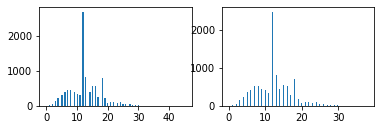

In [872]:
nr = df[df.player_hand=='R'].GmsWon
nl = df[df.player_hand=='L'].GmsWon

plt.subplot(2,2,1)
_=plt.hist(nr, bins=100)
plt.subplot(2,2,2)
_=plt.hist(nl, bins=100)
plt.show()

In [873]:
lefties = df[df.player_hand=='L'].GmsWon
righties = df[df.player_hand=='R'].GmsWon
s, p = stats.ttest_ind(lefties, righties, equal_var = False)
print('T test statistic = ' + str(s))
print('T test p-value = ' + str(p))

T test statistic = -3.9842734828106807
T test p-value = 6.792516030497545e-05


#### T test shows statistical significant difference of games won between righties and lefties. Reject Null Hypothesis

In [874]:
bs_rep_r = draw_bs_reps(righties, np.mean, N_rep)
bs_rep_l = draw_bs_reps(lefties, np.mean, N_rep)
r_int_low, r_int_high = np.percentile(bs_rep_r, [2.5, 97.5])
l_int_low, l_int_high = np.percentile(bs_rep_l, [2.5, 97.5])


print('righties mean ='+str(bs_rep_r.mean()), 'lefties mean = '+ str(bs_rep_l.mean()))
print('righties 95% confidence interval: '+ '[' + str(r_int_low) + ',' + str(r_int_high)+']')
print('lefties 95% confidence interval: '+ '[' + str(l_int_low) + ',' + str(l_int_high)+']')

righties mean =12.634516501092788 lefties mean = 12.357679932445858
righties 95% confidence interval: [12.537847705146035,12.731571627260083]
lefties 95% confidence interval: [12.259286211007351,12.456688356844824]


[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

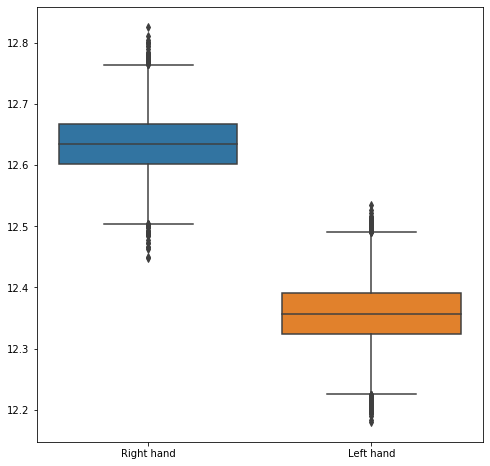

In [875]:
data_to_plot = [bs_rep_r, bs_rep_l]
xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

#### Conclusion: Statisitcally, righties win more games than lefties  

### Statistical significant difference test for games Loss between righties and lefties. 

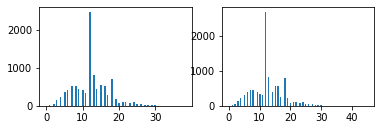

In [876]:
nr = df[df.player_hand=='R'].GmsLoss
nl = df[df.player_hand=='L'].GmsLoss

plt.subplot(2,2,1)
_=plt.hist(nr, bins=100)
plt.subplot(2,2,2)
_=plt.hist(nl, bins=100)
plt.show()

In [877]:
lefties = df[df.player_hand=='L'].GmsLoss
righties = df[df.player_hand=='R'].GmsLoss
s, p = stats.ttest_ind(lefties, righties, equal_var = False)
print('T test statistic = ' + str(s))
print('T test p-value = ' + str(p))

T test statistic = 3.9842734828106807
T test p-value = 6.792516030497545e-05


#### T test shows statistical significant difference of games loss between righties and lefties. Reject null hypothesis

In [878]:
bs_rep_r = draw_bs_reps(righties, np.mean, N_rep)
bs_rep_l = draw_bs_reps(lefties, np.mean, N_rep)
r_int_low, r_int_high = np.percentile(bs_rep_r, [2.5, 97.5])
l_int_low, l_int_high = np.percentile(bs_rep_l, [2.5, 97.5])


print('righties mean ='+str(bs_rep_r.mean()), 'lefties mean = '+ str(bs_rep_l.mean()))
print('righties 95% confidence interval: '+ '[' + str(r_int_low) + ',' + str(r_int_high)+']')
print('lefties 95% confidence interval: '+ '[' + str(l_int_low) + ',' + str(l_int_high)+']')

righties mean =12.357727518378699 lefties mean = 12.634909646334195
righties 95% confidence interval: [12.261471786211008,12.454102920723226]
lefties 95% confidence interval: [12.53834442678323,12.731372938605206]


[Text(0, 0, 'Right hand'), Text(0, 0, 'Left hand')]

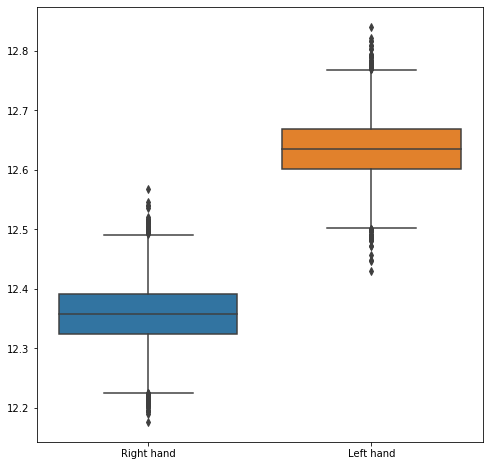

In [879]:
data_to_plot = [bs_rep_r, bs_rep_l]
xticklables = ['Right hand', 'Left hand']

fig = plt.figure(1, figsize=(8, 8))
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(xticklables)

#### Conclusion: Statisitcally, lefties lose more games than righties  

### Summary: 
First, performed t-test to check if there are significant difference on serve stats (ace%, 1stIn%, 1stWon%, 2ndIn%, 2ndWon%, bpFaced, games won and game loss between righties and lefties. Only 1stWon% doesn't have significant difference between righties and lefties.  The rest null hypothesis are rejected.  

Then, perform bootstrap to generate sample mean distribution for righties and lefties.  Calculated mean, 95% confidence interval and plot boxplot.  Lefties have better 1stIn% than righties.  Righties have advantages of the rest.  

The statistical conclusion are drawn by analyzing ATP historcal data.  So these conclusions are onaly applied to ATP players.

## Exam correlation

In [880]:
#df.corr(method='pearson')
columns=['minutes','ace','df','svpt','sv1stIn','sv1stIn_pct','sv1stWon','sv1stWon_pct','sv2ndWon','SvGms','bpSaved','bpFaced','player_rank','player_ht', 'GmsWon','GmsLoss']
df[columns].corr(method='pearson')
#df.info()

,minutes,ace,df,svpt,sv1stIn,sv1stIn_pct,sv1stWon,sv1stWon_pct,sv2ndWon,SvGms,bpSaved,bpFaced,player_rank,player_ht,GmsWon,GmsLoss
minutes,1.000000,0.322176,0.328276,0.874070,0.824640,0.024005,0.791885,0.018101,0.686955,0.863057,0.440130,0.455650,-0.059588,0.028991,0.709676,0.709676
ace,0.322176,1.000000,0.246169,0.403280,0.365209,-0.021515,0.522221,0.312084,0.394116,0.464864,0.048141,-0.053126,-0.022740,0.373494,0.456843,0.295926
df,0.328276,0.246169,1.000000,0.439680,0.291122,-0.315696,0.295259,-0.209075,0.368336,0.382315,0.314387,0.360003,0.097350,0.075910,0.212709,0.418348
svpt,0.874070,0.403280,0.439680,1.000000,0.934500,0.003544,0.889287,-0.017042,0.766248,0.937670,0.575299,0.571313,0.010668,0.036904,0.731015,0.803627
sv1stIn,0.824640,0.365209,0.291122,0.934500,1.000000,0.338957,0.941987,0.201066,0.560611,0.888194,0.516611,0.495159,-0.015197,0.058093,0.719665,0.732244
sv1stIn_pct,0.024005,-0.021515,-0.315696,0.003544,0.338957,1.000000,0.303086,0.662799,-0.405355,0.035243,-0.054031,-0.109247,-0.071785,0.065897,0.118551,-0.066904
sv1stWon,0.791885,0.522221,0.295259,0.889287,0.941987,0.303086,1.000000,0.413685,0.589224,0.895073,0.383052,0.291461,-0.046893,0.136278,0.822011,0.634988
sv1stWon_pct,0.018101,0.312084,-0.209075,-0.017042,0.201066,0.662799,0.413685,1.000000,-0.168767,0.107285,-0.264114,-0.465000,-0.132649,0.208332,0.390313,-0.235005
sv2ndWon,0.686955,0.394116,0.368336,0.766248,0.560611,-0.405355,0.589224,-0.168767,1.000000,0.764285,0.347225,0.281973,-0.009050,0.010240,0.691975,0.553420
SvGms,0.863057,0.464864,0.382315,0.937670,0.888194,0.035243,0.895073,0.107285,0.764285,1.000000,0.378275,0.398371,-0.015712,0.065355,0.831664,0.800308


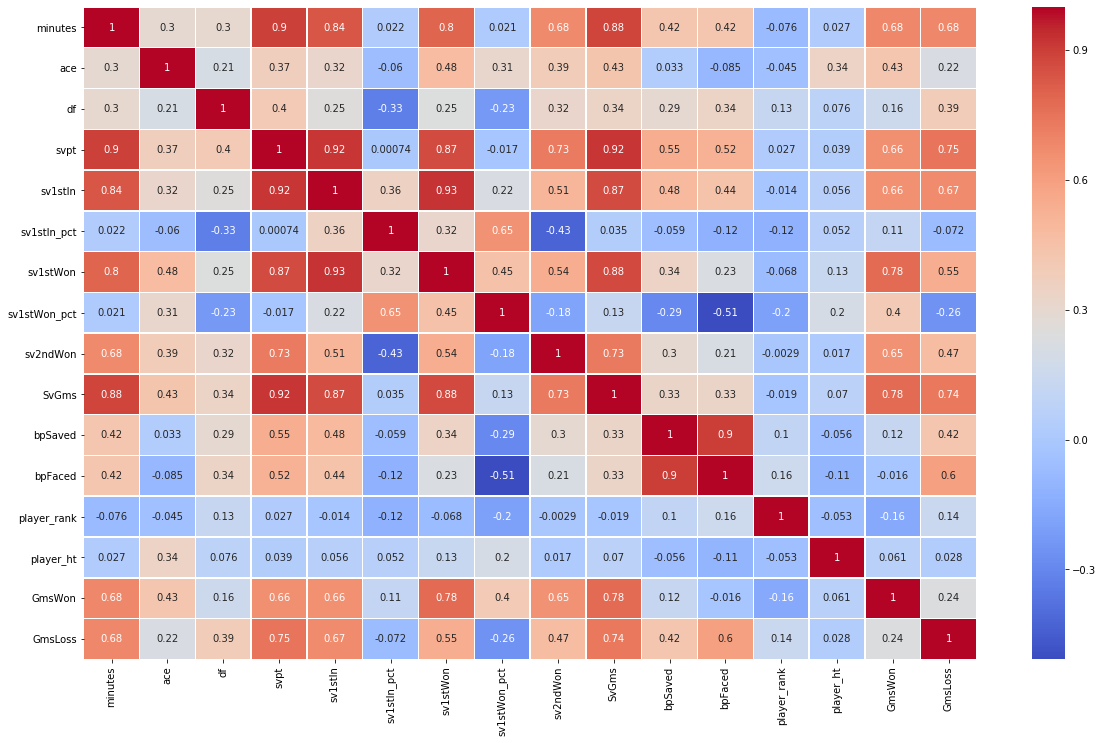

In [881]:
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(df[columns].corr(method='spearman'), annot=True, linewidth=.5, cmap='coolwarm')

plt.show()

#### from the heatmap, we can see that GmsWon has correlation with 1stWon,  1stIn, 2ndWon, ace in descending order

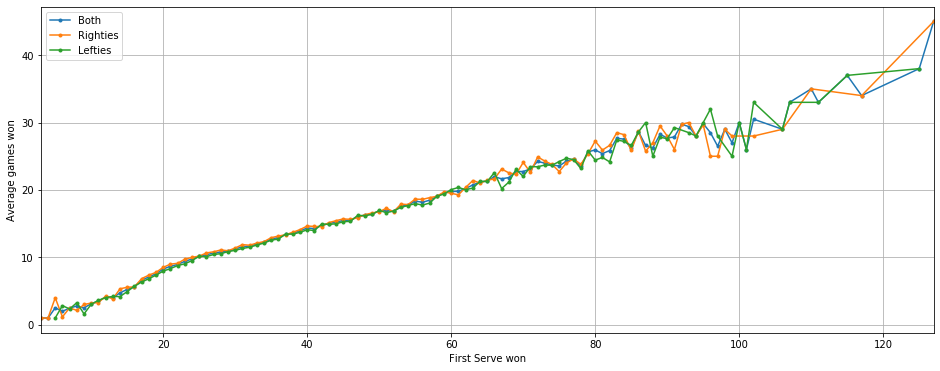

In [882]:
plt.figure(figsize=(16,6))

cor_plot=df.groupby('sv1stWon').GmsWon.mean().plot(kind='line', grid=True, label='Both',marker='.')
cor_plot1=df[df.player_hand=='R'].groupby('sv1stWon').GmsWon.mean().plot(kind='line', grid=True, label='Righties',marker='.')
cor_plot2=df[df.player_hand=='L'].groupby('sv1stWon').GmsWon.mean().plot(kind='line', grid=True, label='Lefties',marker='.')
plt.xlabel('First Serve won')
plt.ylabel('Average games won')
h1, l1 = cor_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

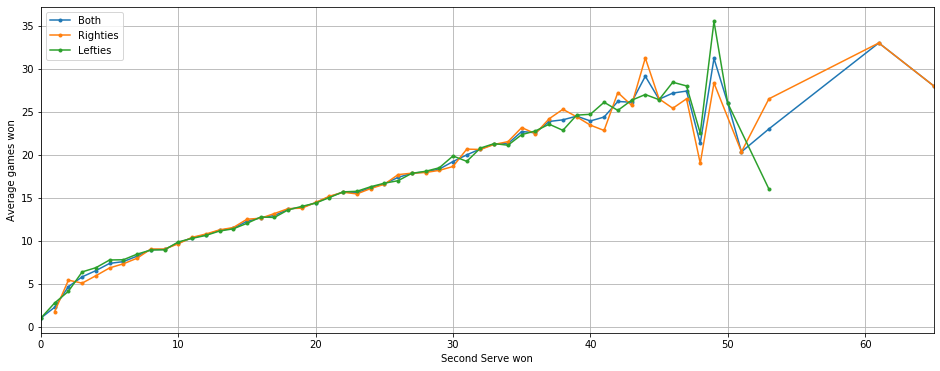

In [883]:
plt.figure(figsize=(16,6))

cor_plot=df.groupby('sv2ndWon').GmsWon.mean().plot(kind='line', grid=True, label='Both',marker='.')
cor_plot1=df[df.player_hand=='R'].groupby('sv2ndWon').GmsWon.mean().plot(kind='line', grid=True, label='Righties',marker='.')
cor_plot2=df[df.player_hand=='L'].groupby('sv2ndWon').GmsWon.mean().plot(kind='line', grid=True, label='Lefties',marker='.')
plt.xlabel('Second Serve won')
plt.ylabel('Average games won')
h1, l1 = cor_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

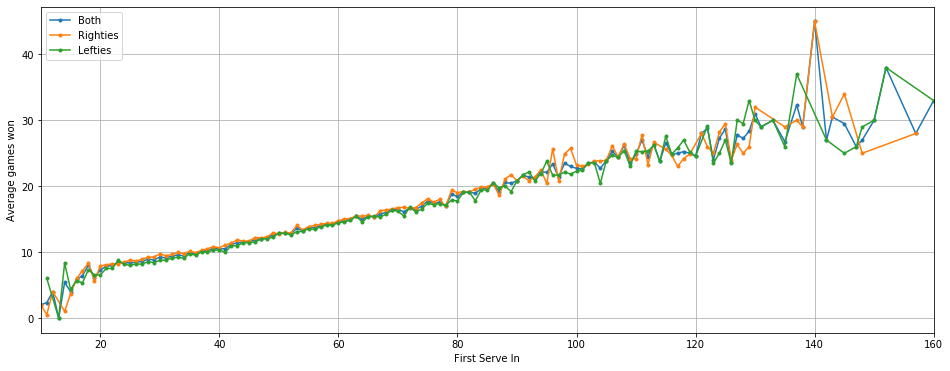

In [884]:
plt.figure(figsize=(16,6))

cor_plot=df.groupby('sv1stIn').GmsWon.mean().plot(kind='line', grid=True, label='Both',marker='.')
cor_plot1=df[df.player_hand=='R'].groupby('sv1stIn').GmsWon.mean().plot(kind='line', grid=True, label='Righties',marker='.')
cor_plot2=df[df.player_hand=='L'].groupby('sv1stIn').GmsWon.mean().plot(kind='line', grid=True, label='Lefties',marker='.')
plt.xlabel('First Serve In')
plt.ylabel('Average games won')
h1, l1 = cor_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

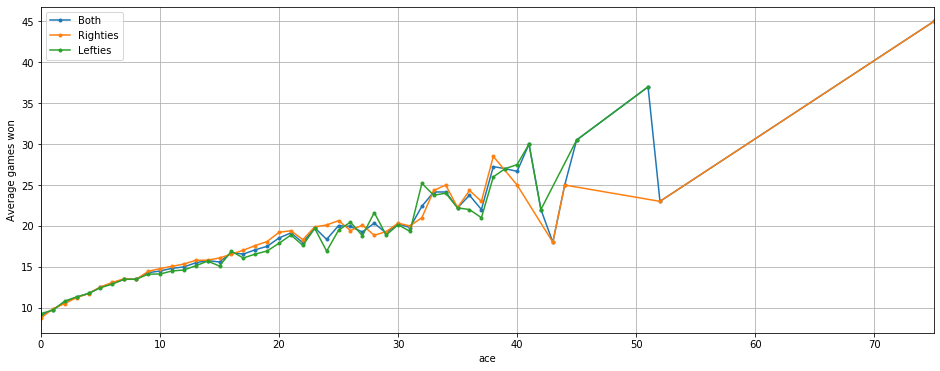

In [885]:
plt.figure(figsize=(16,6))

cor_plot=df.groupby('ace').GmsWon.mean().plot(kind='line', grid=True, label='Both',marker='.')
cor_plot1=df[df.player_hand=='R'].groupby('ace').GmsWon.mean().plot(kind='line', grid=True, label='Righties',marker='.')
cor_plot2=df[df.player_hand=='L'].groupby('ace').GmsWon.mean().plot(kind='line', grid=True, label='Lefties',marker='.')
plt.xlabel('ace')
plt.ylabel('Average games won')
h1, l1 = cor_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

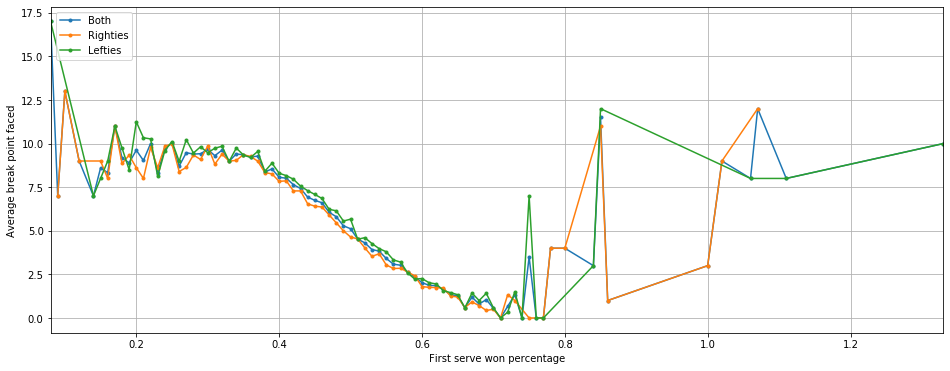

In [886]:
plt.figure(figsize=(16,6))

cor_plot=df.groupby('sv1stWon_pct').bpFaced.mean().plot(kind='line', grid=True, label='Both',marker='.')
cor_plot1=df[df.player_hand=='R'].groupby('sv1stWon_pct').bpFaced.mean().plot(kind='line', grid=True, label='Righties',marker='.')
cor_plot2=df[df.player_hand=='L'].groupby('sv1stWon_pct').bpFaced.mean().plot(kind='line', grid=True, label='Lefties',marker='.')
plt.xlabel('First serve won percentage')
plt.ylabel('Average break point faced')
h1, l1 = cor_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

In [887]:
# 58 rows exceptions
df[(df.sv1stWon_pct>=0.70)]

,Unnamed: 0,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,player_id,player_name,player_hand,...,sv1stWon_pct,sv2ndWon_pct,GmsWon,GmsLoss,year,opponent_id,opponent_name,won_flag,player_age_bucket,bpLoss
929,1191,2001-409,Atlanta,Clay,A,20010423,25,102259,Jerome Golmard,L,...,0.73,0.07,12.0,1.0,2001,103294,Christophe Rochus,1,25-29,0.0
2460,3015,2003-1536,Madrid Masters,Hard,M,20031013,5,102374,Alex Corretja,R,...,1.02,0.76,15.0,12.0,2003,104745,Rafael Nadal,1,25-29,4.0
2461,3017,2003-1536,Madrid Masters,Hard,M,20031013,7,103852,Feliciano Lopez,L,...,0.73,0.65,15.0,11.0,2003,103151,Mariano Zabaleta,1,20-24,2.0
2462,3018,2003-1536,Madrid Masters,Hard,M,20031013,8,103292,Gaston Gaudio,R,...,1.00,0.46,16.0,13.0,2003,103813,Jarkko Nieminen,1,20-24,2.0
2463,3025,2003-1536,Madrid Masters,Hard,M,20031013,15,103454,Nicolas Massu,R,...,0.86,0.57,12.0,10.0,2003,104269,Fernando Verdasco,1,20-24,1.0
2464,3033,2003-1536,Madrid Masters,Hard,M,20031013,23,103852,Feliciano Lopez,L,...,0.84,0.57,15.0,13.0,2003,102882,Mark Philippoussis,1,20-24,1.0
2465,3046,2003-1536,Madrid Masters,Hard,M,20031013,36,103852,Feliciano Lopez,L,...,0.75,0.62,19.0,12.0,2003,102845,Carlos Moya,1,20-24,1.0
2466,3052,2003-1536,Madrid Masters,Hard,M,20031013,42,103819,Roger Federer,R,...,0.78,0.69,16.0,16.0,2003,103852,Feliciano Lopez,1,20-24,1.0
2692,1363,2004-414,Hamburg Masters,Clay,M,20040510,35,104269,Fernando Verdasco,L,...,0.70,0.12,12.0,7.0,2004,104026,Joachim Johansson,1,20-24,0.0
2747,1728,2004-440,'s-Hertogenbosch,Grass,A,20040614,14,103566,Michael Llodra,L,...,0.71,0.20,12.0,4.0,2004,104229,Yen Hsun Lu,1,20-24,0.0


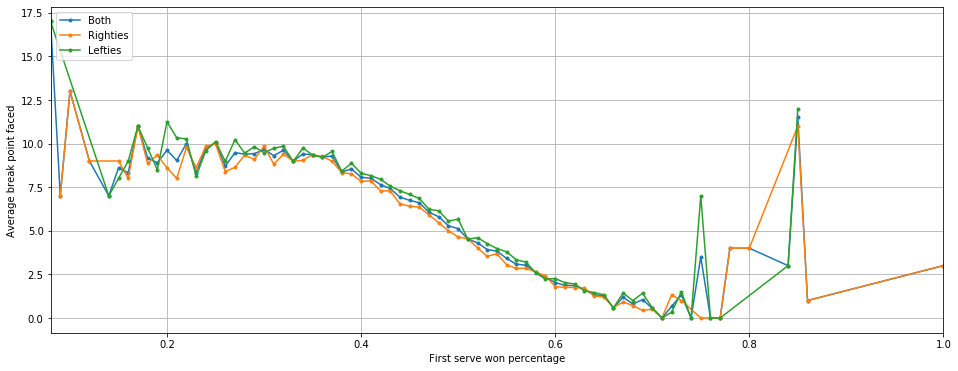

In [888]:
plt.figure(figsize=(16,6))

cor_plot=df[df.sv1stWon_pct<=1].groupby('sv1stWon_pct').bpFaced.mean().plot(kind='line', grid=True, label='Both',marker='.')
cor_plot1=df[(df.player_hand=='R') & (df.sv1stWon_pct<=1)].groupby('sv1stWon_pct').bpFaced.mean().plot(kind='line', grid=True, label='Righties',marker='.')
cor_plot2=df[(df.player_hand=='L') & (df.sv1stWon_pct<=1)].groupby('sv1stWon_pct').bpFaced.mean().plot(kind='line', grid=True, label='Lefties',marker='.')
plt.xlabel('First serve won percentage')
plt.ylabel('Average break point faced')
h1, l1 = cor_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

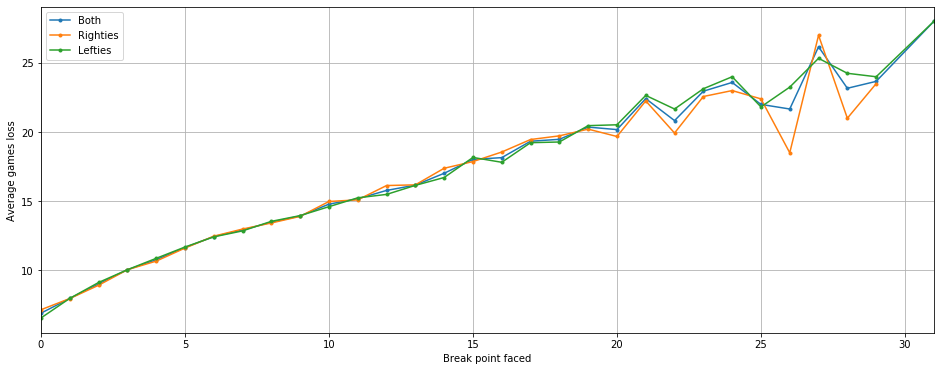

In [889]:
plt.figure(figsize=(16,6))

cor_plot=df.groupby('bpFaced').GmsLoss.mean().plot(kind='line', grid=True, label='Both',marker='.')
cor_plot1=df[df.player_hand=='R'].groupby('bpFaced').GmsLoss.mean().plot(kind='line', grid=True, label='Righties',marker='.')
cor_plot2=df[df.player_hand=='L'].groupby('bpFaced').GmsLoss.mean().plot(kind='line', grid=True, label='Lefties',marker='.')
plt.xlabel('Break point faced')
plt.ylabel('Average games loss')
h1, l1 = cor_plot.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)
plt.show()

In [890]:
def pearsonr_ci(x,y,alpha=0.05):

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    low_z, high_z = r_z-z*se, r_z+z*se
    low, high = np.tanh((low_z, high_z))
    return r, p, low, high

In [891]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['sv1stWon'], y=df['GmsWon'], alpha=.05)

print('Dependent: Games Won')
print('Independent: 1st server won percentage')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Games Won
Independent: 1st server won percentage
p-value: 0.0
r: 0.8220112486228746
r^2: 0.6757024928625373
CI: 0.8174800552034823 to 0.826440693991839
